In [1]:
from tdwg.lib.optical_helpers import find_modes, get_TE_mode_shape
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
# refraction indices
nc = 1.444 # top-cladding, [c]over
nf = 1.942 # core, guiding [f]ilm 
ns = 1.444 # bottom-cladding, [s]ubstrate

# thickness of slab (guiding film) 
# cladding is assumed to be infinitely thick)
h = 700e-9 # (m)
# free-space wavelength
lambda0 = 1550e-9
k0 = 2*np.pi/lambda0

In [4]:
betaAllowedTE = []
n_initial_conditions = 10
while list(betaAllowedTE) == []:
    n_initial_conditions += 10
    betaAllowedTE, betaAllowedTM = find_modes(h, k0, nc, nf, ns, n_initial_conditions=n_initial_conditions)
beta = betaAllowedTE
neff = beta/k0
neff

array([1.81007157, 1.47279846])

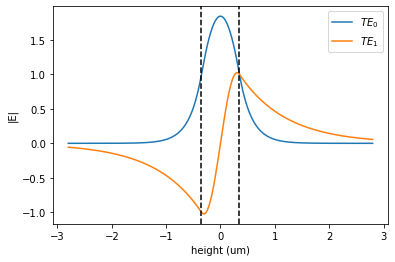

In [20]:
x = np.linspace(-4*h, 4*h, 200)
for mode_number in range(len(beta)):
    E = get_TE_mode_shape(x, betaAllowedTE[mode_number], h, k0, ns, nf, nc, mode_number)
    plt.plot(1e6*x, E, label = f'$TE_{mode_number}$')
plt.xlabel('height (um)')
plt.ylabel('|E|')
plt.axvline(-h/2*1e6, c='k', ls='--')
plt.axvline(h/2*1e6, c='k', ls='--')
plt.legend()